**TITANIC CLASSIFICATION**

*IMPORTING IMPORTANT LIBRARIES*

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*IMPORTING DATASET*

In [33]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(10) # Displaying first 10 rows of data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
df.shape # Displaying dimensions of the dataframe

(891, 12)

In [35]:
df.describe() # Displaying basic statistics of the dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**From the above cell, we can see that there are few values missing in the Age column**

In [36]:
df.info() # Displaying info of the dataframe to understand data-types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


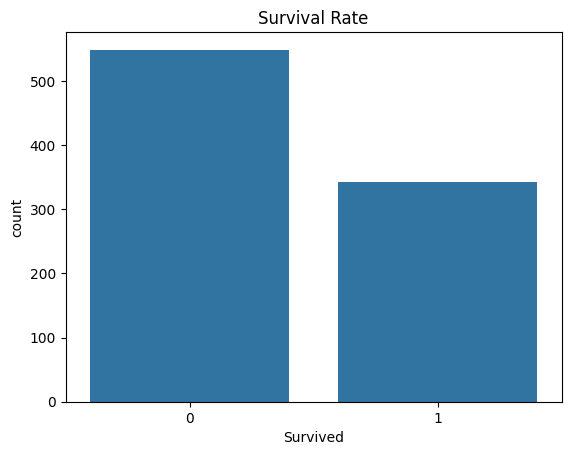

In [37]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Rate')
plt.show()

In [38]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**0 respresents "Not Survived" individuals and 1 represents those who "Survived"**

**Let's visualize the count of survivals with the help of pclass (Passenger Class)**

Text(0.5, 1.0, 'Survival Rate by Socio-Economic (Passenger Class) Status')

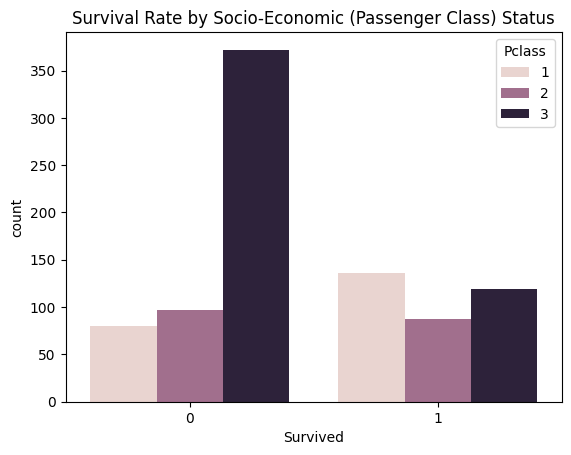

In [39]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])
plt.title("Survival Rate by Socio-Economic (Passenger Class) Status")

**3rd Class Passengers were the least ones to survive while 1st class passengers were the most ones to survive**

In [40]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

**Let's visualize the count of survivals with respect to Gender**

Text(0.5, 1.0, 'Survival Rate by Gender')

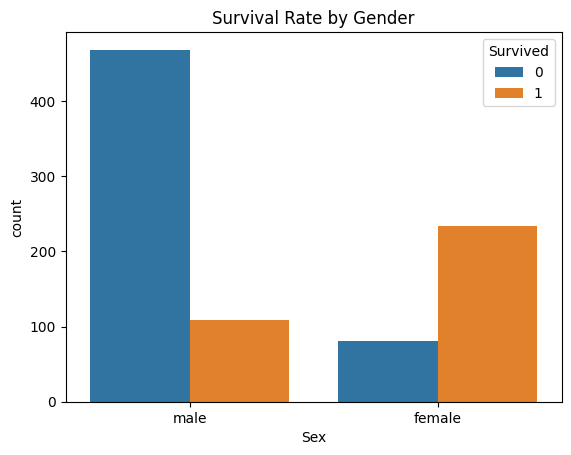

In [41]:
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.title("Survival Rate by Gender")

**Males were the most ones to die while Females were the most to survive**

**Look at the survival rate by Sex**

In [42]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [43]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


**Now, you can see men are labeled as 1 while women are labeled as 0**

In [45]:
df['Sex'], df['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

Text(0.5, 1.0, 'Survival Rate by Labeled Genders')

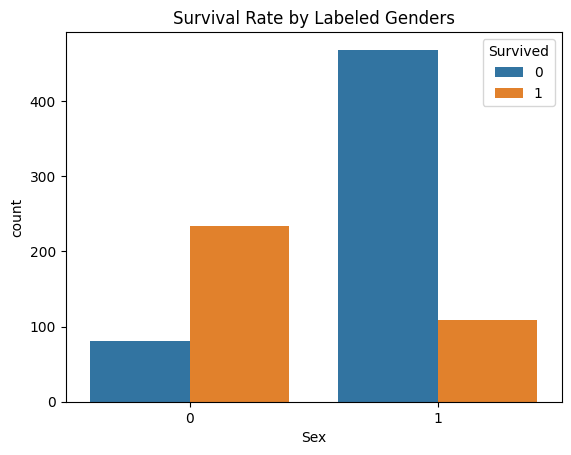

In [46]:
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.title("Survival Rate by Labeled Genders")

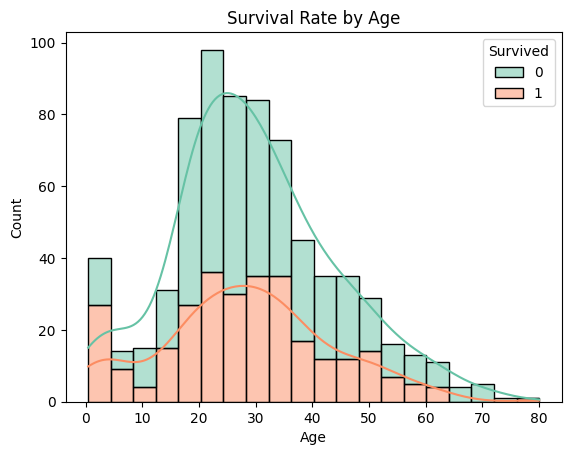

In [47]:
plt.figure(facecolor='white')
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True, palette='Set2')
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

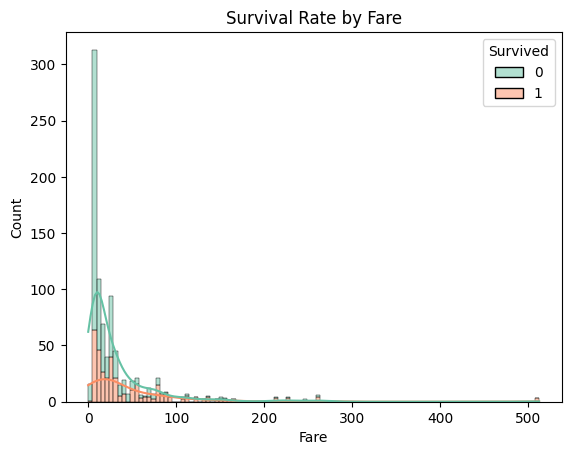

In [48]:
plt.figure(facecolor='white')
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', kde=True, palette='Set2')
plt.title("Survival Rate by Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [49]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age column is the only one with "Null" values. Let's impute missing values (with the median) for model training:**

In [50]:
df.fillna(df['Age'].median(), inplace=True)

In [51]:
df_final = df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,28.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,28.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,28.0,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,28.0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,28.0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,28.0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,28.0,C


*MODEL TRAINING*

In [52]:
X = df[['Pclass','Sex','Age','Fare']]
Y = df['Survived']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train,Y_train)

LogisticRegression(random_state=0)

*MODEL PREDICTION*

In [55]:
pred = log.predict(X_test)
print(pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [56]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy: ",accuracy_score(Y_test, pred))
print("Classification Report: ",classification_report(Y_test, pred))
print("Confusion Matrix: ",confusion_matrix(Y_test, pred))

Accuracy:  0.8100558659217877
Classification Report:                precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:  [[94 16]
 [18 51]]


**From X and Y tests sets predictions, we can see that our data along with the model is working fine**

**Let's check from user perspective:**

In [58]:
import warnings
warnings.filterwarnings("ignore")
in_pclass = int(input("Enter the passenger's class: "))
in_sex = int(input("Enter the label of passenger's gender (0 for female, 1 for male): "))
in_age = float(input("Enter the passenger's age: "))
in_fare = float(input("Enter the passenger's fare: "))
res = log.predict([[in_pclass,in_sex,in_age,in_fare]])
if(res==0):
    print("So Sorry! Your passenger wasn't Survived")
else:
    print("Your passenger was Survived")

Enter the passenger's class:  1
Enter the label of passenger's gender (0 for female, 1 for male):  1
Enter the passenger's age:  65
Enter the passenger's fare:  999


So Sorry! Your passenger wasn't Survived
